# Moving Average Convergence Divergence (MACD)

The moving average convergence divergence (MACD) is another in the class of indicators  
that builds on top of moving averages of price.

It is similar to an absolute price oscillator (APO) in that it establishes the difference  
between a fast exponential moving average and a slow exponential moving average.  
However in the case of MACD, we apply a smoothing exponential moving average to the MACD  
value itself in order to get the final signal output from the MACD indicator.   
Optionally, you may also look at the difference between MACD values and the EMA of the MACD  
values (signal) and visualize it  as a histogram. A property configured MACD signal can  
successfully capture the direction, magnitude, and duration of a trend instrument price.

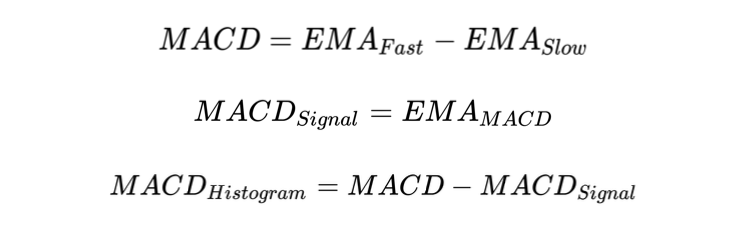

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/LTCUSDT.csv')
close = df['Close']

In [22]:
# Fast EMA time moving period
num_periods_fast = 10
K_fast = 2 / (num_periods_fast + 1)
ema_fast = 0

# Slow EMA time moving period
num_period_slow = 40
K_slow = 2 / (num_period_slow + 1)
ema_slow = 0

# MACD EMA time period
num_period_macd = 20
K_macd = 2 / (num_period_macd)
ema_macd = 0

ema_fast_values = []
ema_slow_values = []
macd_values = []
macd_signal_values = []

macd_histogram_values = []

for close_price in close:
    if (ema_fast == 0):
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    macd = ema_fast - ema_slow
    
    if ema_macd == 0:
        ema_macd = macd
    else:
        ema_macd = (macd - ema_macd) * K_slow + ema_macd
        
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    macd_histogram_values.append(macd - ema_macd)
    

In [23]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(FastExponential10MovingAverage=pd.Series(ema_fast_values, index=df.index))
df_data = df_data.assign(SlowExponential40MovingAverage=pd.Series(ema_slow_values, index=df.index))
df_data = df_data.assign(MACD=pd.Series(macd_values, index=df.index))
df_data = df_data.assign(Exponential20MovingAverageOfMACD=pd.Series(macd_signal_values, index=df.index))
df_data = df_data.assign(MACDHistogram=pd.Series(macd_histogram_values, index=df.index))

close_price = df_data['ClosePrice']
ema_f = df_data['FastExponential10MovingAverage']
ema_s = df_data['SlowExponential40MovingAverage']
macd = df_data['MACD']
ema_macd = df_data['Exponential20MovingAverageOfMACD']
macd_histogram = df_data['MACDHistogram']

ema_macd

0      0.000000
1     -0.186253
2     -0.195190
3     -0.213083
4     -0.227435
         ...   
495   -3.191512
496   -3.238106
497   -3.282529
498   -3.323070
499   -3.360465
Name: Exponential20MovingAverageOfMACD, Length: 500, dtype: float64

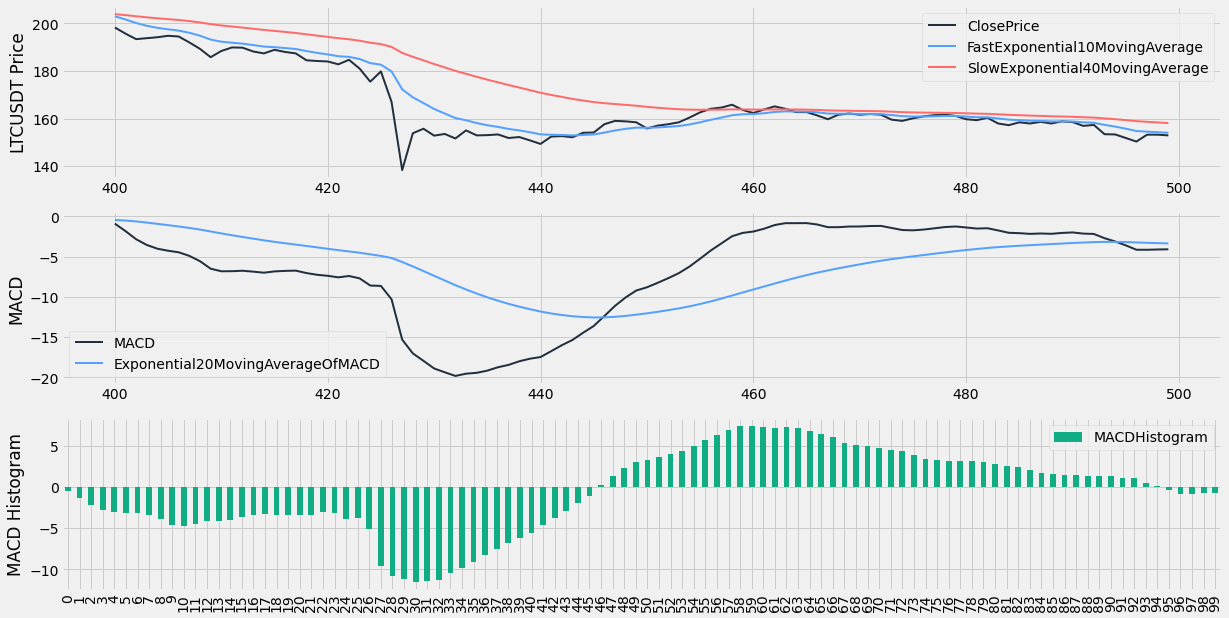

In [26]:
fig = plt.figure()
fig.set_size_inches(18.5, 10,5)

ax1 = fig.add_subplot(311, ylabel='LTCUSDT Price')
close_price[400:500].plot(ax=ax1, color="#222f3e", lw=2., legend=True)
ema_f[400:500].plot(ax=ax1, color='#54a0ff', lw=2., legend=True)
ema_s[400:500].plot(ax=ax1, color='#ff6b6b', lw=2., legend=True)

ax2 = fig.add_subplot(312, ylabel='MACD')
macd[400:500].plot(ax=ax2, color='#222f3e', lw=2., legend=True)
ema_macd[400:500].plot(ax=ax2, color='#54a0ff', lw=2., legend=True)

ax3 = fig.add_subplot(313, ylabel='MACD Histogram')
macd_histogram[400:500].plot(ax=ax3, color='#10ac84', kind='bar', legend=True, use_index=False)

plt.show()